In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# load star/quasar dataset
from pandas import read_csv
dataset = read_csv("../data/sdss_photo.csv", delimiter=",")

In [19]:
dataset.head()

,mag_u,mag_g,mag_r,mag_i,mag_z,target,u-g,g-r,r-i,i-z
0,19.240999,17.525999,16.840000,16.613001,16.492001,star,1.715000,0.685999,0.226999,0.121000
1,19.732000,18.339001,17.767000,17.580000,17.481001,star,1.393000,0.572001,0.187000,0.098999
2,16.120001,15.232000,14.933000,14.845000,14.827000,star,0.888000,0.299001,0.087999,0.018001
3,18.995001,18.150999,17.877001,17.747000,17.766001,star,0.844002,0.273998,0.130001,-0.019001
4,19.032000,18.112000,17.848000,17.709999,17.712000,star,0.920000,0.264000,0.138000,-0.002001


In [7]:
# split into input (X) and output (y) variables
X = dataset[['u-g','g-r','r-i','i-z']]
y = dataset['target']

In [8]:
# encode labels from 'star' and 'QSO' to 0,1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
# create train and test set, leave 0.25 for validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X.shape, X_train.shape, X_test.shape

((867, 4), (580, 4), (287, 4))

In [17]:
from keras.models import Sequential

In [35]:
from keras.models import Sequential
from keras.layers import  Dense # use tab to see what's available
from keras.layers import Dropout

In [43]:
# create model
def createModel():
    model = Sequential()
    # add Dense layer of 12 neuron and 'relu' activation
    # first layer must have input_dim=
    model.add(Dense(12, input_dim=4, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.5))
    # last layer does the classifiction, we have only 2 classes
    # therefore 1 neuron with sigmoid activation function would do the job
    model.add(Dense(1, activation='sigmoid'))
    return model

In [44]:
model = createModel()

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                60        
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [46]:
# compile the model
model.compile(loss='binary_crossentropy', # we use two complementing classes 
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
# fit the model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test), 
          epochs=500, 
          batch_size=50, 
          verbose=1)

Train on 580 samples, validate on 287 samples
Epoch 1/500
580/580 [==============================] - 1s 1ms/step - loss: 0.7741 - acc: 0.5190 - val_loss: 0.7031 - val_acc: 0.5296
Epoch 2/500
580/580 [==============================] - 0s 52us/step - loss: 0.7110 - acc: 0.5862 - val_loss: 0.6853 - val_acc: 0.6620
Epoch 3/500
580/580 [==============================] - 0s 53us/step - loss: 0.7480 - acc: 0.5776 - val_loss: 0.6694 - val_acc: 0.7178
Epoch 4/500
580/580 [==============================] - 0s 54us/step - loss: 0.7036 - acc: 0.6621 - val_loss: 0.6537 - val_acc: 0.7700
Epoch 5/500
580/580 [==============================] - 0s 54us/step - loss: 0.6836 - acc: 0.7103 - val_loss: 0.6386 - val_acc: 0.7909
Epoch 6/500
580/580 [==============================] - 0s 57us/step - loss: 0.6939 - acc: 0.6948 - val_loss: 0.6254 - val_acc: 0.8014
Epoch 7/500
580/580 [==============================] - 0s 57us/step - loss: 0.6801 - acc: 0.6931 - val_loss: 0.6137 - val_acc: 0.8084
Epoch 8/500
580/5

580/580 [==============================] - 0s 55us/step - loss: 0.2983 - acc: 0.9224 - val_loss: 0.2158 - val_acc: 0.9512
Epoch 62/500
580/580 [==============================] - 0s 54us/step - loss: 0.2866 - acc: 0.9155 - val_loss: 0.2116 - val_acc: 0.9547
Epoch 63/500
580/580 [==============================] - 0s 56us/step - loss: 0.3019 - acc: 0.9224 - val_loss: 0.2088 - val_acc: 0.9547
Epoch 64/500
580/580 [==============================] - 0s 52us/step - loss: 0.3090 - acc: 0.9276 - val_loss: 0.2063 - val_acc: 0.9547
Epoch 65/500
580/580 [==============================] - 0s 48us/step - loss: 0.2983 - acc: 0.9276 - val_loss: 0.2042 - val_acc: 0.9512
Epoch 66/500
580/580 [==============================] - 0s 46us/step - loss: 0.2854 - acc: 0.9276 - val_loss: 0.2013 - val_acc: 0.9547
Epoch 67/500
580/580 [==============================] - 0s 46us/step - loss: 0.2703 - acc: 0.9207 - val_loss: 0.1984 - val_acc: 0.9582
Epoch 68/500
580/580 [==============================] - 0s 47us/step

580/580 [==============================] - 0s 49us/step - loss: 0.2266 - acc: 0.9448 - val_loss: 0.1445 - val_acc: 0.9617
Epoch 122/500
580/580 [==============================] - 0s 50us/step - loss: 0.2017 - acc: 0.9431 - val_loss: 0.1450 - val_acc: 0.9617
Epoch 123/500
580/580 [==============================] - 0s 47us/step - loss: 0.1759 - acc: 0.9500 - val_loss: 0.1447 - val_acc: 0.9617
Epoch 124/500
580/580 [==============================] - 0s 47us/step - loss: 0.1910 - acc: 0.9448 - val_loss: 0.1444 - val_acc: 0.9617
Epoch 125/500
580/580 [==============================] - 0s 47us/step - loss: 0.1874 - acc: 0.9586 - val_loss: 0.1446 - val_acc: 0.9582
Epoch 126/500
580/580 [==============================] - 0s 47us/step - loss: 0.2143 - acc: 0.9517 - val_loss: 0.1441 - val_acc: 0.9582
Epoch 127/500
580/580 [==============================] - 0s 47us/step - loss: 0.1839 - acc: 0.9534 - val_loss: 0.1438 - val_acc: 0.9582
Epoch 128/500
580/580 [==============================] - 0s 46

580/580 [==============================] - 0s 45us/step - loss: 0.1695 - acc: 0.9534 - val_loss: 0.1338 - val_acc: 0.9652
Epoch 182/500
580/580 [==============================] - 0s 50us/step - loss: 0.1434 - acc: 0.9655 - val_loss: 0.1325 - val_acc: 0.9652
Epoch 183/500
580/580 [==============================] - 0s 44us/step - loss: 0.1867 - acc: 0.9414 - val_loss: 0.1303 - val_acc: 0.9652
Epoch 184/500
580/580 [==============================] - 0s 48us/step - loss: 0.2070 - acc: 0.9534 - val_loss: 0.1303 - val_acc: 0.9652
Epoch 185/500
580/580 [==============================] - 0s 51us/step - loss: 0.1485 - acc: 0.9655 - val_loss: 0.1296 - val_acc: 0.9652
Epoch 186/500
580/580 [==============================] - 0s 53us/step - loss: 0.1548 - acc: 0.9569 - val_loss: 0.1290 - val_acc: 0.9652
Epoch 187/500
580/580 [==============================] - 0s 47us/step - loss: 0.1766 - acc: 0.9517 - val_loss: 0.1282 - val_acc: 0.9652
Epoch 188/500
580/580 [==============================] - 0s 49

580/580 [==============================] - 0s 45us/step - loss: 0.1526 - acc: 0.9603 - val_loss: 0.1190 - val_acc: 0.9617
Epoch 242/500
580/580 [==============================] - 0s 50us/step - loss: 0.1738 - acc: 0.9586 - val_loss: 0.1187 - val_acc: 0.9617
Epoch 243/500
580/580 [==============================] - 0s 47us/step - loss: 0.1249 - acc: 0.9690 - val_loss: 0.1186 - val_acc: 0.9617
Epoch 244/500
580/580 [==============================] - 0s 45us/step - loss: 0.1809 - acc: 0.9552 - val_loss: 0.1185 - val_acc: 0.9617
Epoch 245/500
580/580 [==============================] - 0s 45us/step - loss: 0.1591 - acc: 0.9655 - val_loss: 0.1184 - val_acc: 0.9617
Epoch 246/500
580/580 [==============================] - 0s 46us/step - loss: 0.1815 - acc: 0.9603 - val_loss: 0.1191 - val_acc: 0.9617
Epoch 247/500
580/580 [==============================] - 0s 46us/step - loss: 0.1640 - acc: 0.9552 - val_loss: 0.1188 - val_acc: 0.9617
Epoch 248/500
580/580 [==============================] - 0s 45

580/580 [==============================] - 0s 50us/step - loss: 0.1423 - acc: 0.9638 - val_loss: 0.1130 - val_acc: 0.9617
Epoch 302/500
580/580 [==============================] - 0s 52us/step - loss: 0.1343 - acc: 0.9690 - val_loss: 0.1132 - val_acc: 0.9582
Epoch 303/500
580/580 [==============================] - 0s 48us/step - loss: 0.1285 - acc: 0.9707 - val_loss: 0.1150 - val_acc: 0.9582
Epoch 304/500
580/580 [==============================] - 0s 49us/step - loss: 0.1467 - acc: 0.9552 - val_loss: 0.1150 - val_acc: 0.9582
Epoch 305/500
580/580 [==============================] - 0s 48us/step - loss: 0.1278 - acc: 0.9724 - val_loss: 0.1148 - val_acc: 0.9582
Epoch 306/500
580/580 [==============================] - 0s 50us/step - loss: 0.1500 - acc: 0.9621 - val_loss: 0.1144 - val_acc: 0.9582
Epoch 307/500
580/580 [==============================] - 0s 50us/step - loss: 0.1308 - acc: 0.9690 - val_loss: 0.1141 - val_acc: 0.9582
Epoch 308/500
580/580 [==============================] - 0s 50

580/580 [==============================] - 0s 49us/step - loss: 0.1379 - acc: 0.9517 - val_loss: 0.1119 - val_acc: 0.9617
Epoch 362/500
580/580 [==============================] - 0s 49us/step - loss: 0.1216 - acc: 0.9586 - val_loss: 0.1133 - val_acc: 0.9617
Epoch 363/500
580/580 [==============================] - 0s 45us/step - loss: 0.1673 - acc: 0.9586 - val_loss: 0.1128 - val_acc: 0.9617
Epoch 364/500
580/580 [==============================] - 0s 44us/step - loss: 0.1359 - acc: 0.9690 - val_loss: 0.1123 - val_acc: 0.9617
Epoch 365/500
580/580 [==============================] - 0s 48us/step - loss: 0.1571 - acc: 0.9517 - val_loss: 0.1108 - val_acc: 0.9617
Epoch 366/500
580/580 [==============================] - 0s 47us/step - loss: 0.1351 - acc: 0.9603 - val_loss: 0.1107 - val_acc: 0.9617
Epoch 367/500
580/580 [==============================] - 0s 50us/step - loss: 0.1517 - acc: 0.9621 - val_loss: 0.1099 - val_acc: 0.9617
Epoch 368/500
580/580 [==============================] - 0s 46

580/580 [==============================] - 0s 49us/step - loss: 0.1316 - acc: 0.9672 - val_loss: 0.1125 - val_acc: 0.9652
Epoch 422/500
580/580 [==============================] - 0s 50us/step - loss: 0.1084 - acc: 0.9638 - val_loss: 0.1123 - val_acc: 0.9652
Epoch 423/500
580/580 [==============================] - 0s 49us/step - loss: 0.1191 - acc: 0.9672 - val_loss: 0.1127 - val_acc: 0.9652
Epoch 424/500
580/580 [==============================] - 0s 50us/step - loss: 0.1418 - acc: 0.9569 - val_loss: 0.1124 - val_acc: 0.9652
Epoch 425/500
580/580 [==============================] - 0s 48us/step - loss: 0.1370 - acc: 0.9603 - val_loss: 0.1105 - val_acc: 0.9652
Epoch 426/500
580/580 [==============================] - 0s 50us/step - loss: 0.1289 - acc: 0.9724 - val_loss: 0.1097 - val_acc: 0.9652
Epoch 427/500
580/580 [==============================] - 0s 49us/step - loss: 0.1186 - acc: 0.9655 - val_loss: 0.1091 - val_acc: 0.9652
Epoch 428/500
580/580 [==============================] - 0s 48

580/580 [==============================] - 0s 50us/step - loss: 0.1347 - acc: 0.9603 - val_loss: 0.1027 - val_acc: 0.9686
Epoch 482/500
580/580 [==============================] - 0s 54us/step - loss: 0.1375 - acc: 0.9603 - val_loss: 0.1033 - val_acc: 0.9652
Epoch 483/500
580/580 [==============================] - 0s 49us/step - loss: 0.1539 - acc: 0.9621 - val_loss: 0.1043 - val_acc: 0.9652
Epoch 484/500
580/580 [==============================] - 0s 51us/step - loss: 0.1008 - acc: 0.9690 - val_loss: 0.1065 - val_acc: 0.9652
Epoch 485/500
580/580 [==============================] - 0s 50us/step - loss: 0.1300 - acc: 0.9741 - val_loss: 0.1070 - val_acc: 0.9652
Epoch 486/500
580/580 [==============================] - 0s 50us/step - loss: 0.1042 - acc: 0.9707 - val_loss: 0.1076 - val_acc: 0.9652
Epoch 487/500
580/580 [==============================] - 0s 51us/step - loss: 0.1130 - acc: 0.9724 - val_loss: 0.1085 - val_acc: 0.9652
Epoch 488/500
580/580 [==============================] - 0s 51

In [48]:
# estimate accuracy on test dataset using final weights
scores = model.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 99.14%


In [49]:
# estimate accuracy on test dataset using final weights
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 96.52%


Add more layers (at least 3 layers in total)

check the network layout by

    model.summary()

What happens with score on train set and test set?

In [50]:
# check training history
history = model.history.history
print(history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


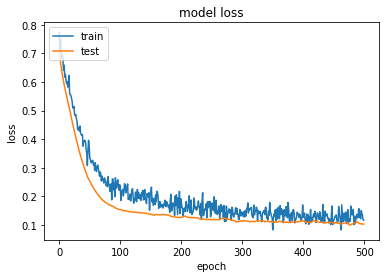

In [51]:
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Double the number of neurons in the first layer. What happenned with train and test (validation) error? Try to fix it with adding a *Dropout* layer.

Try early stopping

In [ ]:
# Checkpoint the weights for best model on validation accuracy
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
# try verbose=1
callbacks_list = [checkpoint]

In [ ]:
model.fit(..., callbacks=callbacks_list, ...)

By doing this you save the best model (the weights) to a file. Then you can load it and use it for classification.

In [ ]:
model.load_weights("weights.best.hdf5")

Warning: you need to recreate model, then load weights and then **compile** it. Only the weights are stored, not the full model.

Now, use a model with only 1 neuron (and the sigmoid activation)

Plot the loss function

What's the evaluation score of such model?

Explain

Compare with scikit-learn LinearRegression model
